In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Task1:  创建VGG16

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # 用于读取图片
import numpy as np

In [0]:
path1 = "drive/My Drive/计算机视觉/Image Captioning/任务一.jpg"

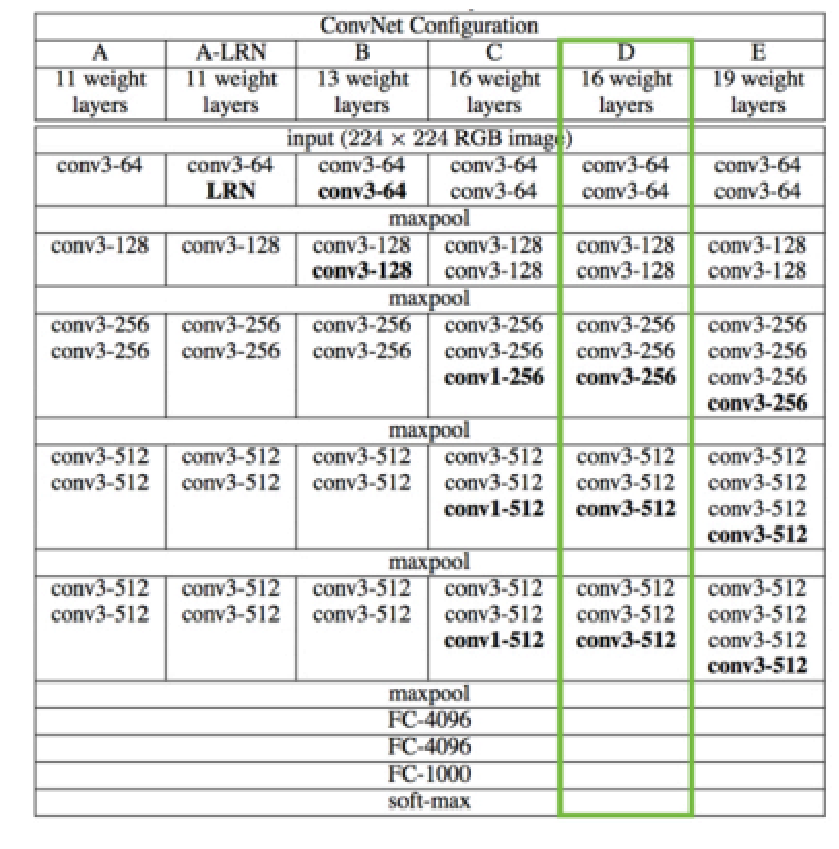

In [5]:
# 网络结构
img1 = mpimg.imread(path1)
plt.figure(figsize = (15, 15))
plt.imshow(img1)
plt.axis('off')
plt.show()

In [0]:
def generate_vgg16():
  '''
  搭建VGG16网络结构
  return: VGG16网络
  '''
  input_shape = (224, 224, 3)
  model = Sequential([
      Conv2D(64, (3, 3), input_shape = input_shape, padding = 'same', activation = 'relu'),
      Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
      MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
      Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
      Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
      MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
      Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),
      Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),
      Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),
      MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
      Conv2D(512, (3, 3), padding = 'same', activation = 'relu'),
      Conv2D(512, (3, 3), padding = 'same', activation = 'relu'),
      Conv2D(512, (3, 3), padding = 'same', activation = 'relu'),
      MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
      Conv2D(512, (3, 3), padding = 'same', activation = 'relu'),
      Conv2D(512, (3, 3), padding = 'same', activation = 'relu'),
      Conv2D(512, (3, 3), padding = 'same', activation = 'relu'),
      MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
      Flatten(),
      Dense(4096, activation = 'relu'),
      Dense(4096, activation = 'relu'),
      Dense(1000, activation = 'softmax')
  ])
  return model

In [7]:
if __name__ == '__main__':
  model = generate_vgg16()
  model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)  

# Task 2：将flicker8k的图像文件转为图像特征，保存为字典pickle文件

In [0]:
from keras.models import model_from_json
from PIL import Image as pil_img
from keras import backend as K
import numpy as np
from pickle import dump
from os import listdir
from keras.models import Model
import keras
import pickle

In [0]:
def load_vgg16_model():
  '''
  从当前目录下面的vgg16_exported.json和vgg16_exported.h5两个文件中导入VGG16网络并返回创建的网络模型
  vgg16_exported.json  下载链接：https://pan.baidu.com/s/13WQBRb4sr3umP7xbUCxmCg  提取码：ycb5
  vgg16_exported.h5    下载链接：https://pan.baidu.com/s/1yF8wybHuzGoTzw5kqTPzzQ  提取码：ub75
  # Returns
    创建的网络模型 model
  '''
  '''
  Example:
  from keras.models import model_from_json
  json_file = open('vgg16_exported.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  
  model = model_from_json(loaded_model_json)
  model.load_weights('vgg16_exported.h5')
  '''
  json_file = open('drive/My Drive/计算机视觉/Image Captioning/vgg16_exported.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  
  model = model_from_json(loaded_model_json)
  model.load_weights('drive/My Drive/计算机视觉/Image Captioning/vgg16_exported.h5')
  return model

In [0]:
def preprocess_input(x):
  '''
  预处理图像用于网络输入，将图像由RGB格式转换为BGR格式
  将图像的每一个图像通道减去其均值
  
  # Arguments:
      x: numpy 数组，4维
      data_format: Data format of the image array
  Returns:
    Preprocessed Numpy array
  '''
  x = x[..., ::-1]
  mean = [103.939, 116.779, 123.68]
  x[..., 0] -= mean[0]
  x[..., 1] -= mean[1]
  x[..., 2] -= mean[2]
  return x

In [0]:
def load_img_as_np_array(path, target_size):
  '''
  从给定文件加载图像，转换图像大小为给定target_size，返回Keras支持的浮点数numpy数组
  
  # Arguments
      path: 图像文件路径
      target_size: 元组(图像高度，图像宽度)
  # Return 
      A PIL Image instance
  '''
  '''
  Example: 
  from PIL import Image
  img = Image.open(filepath)
  img.resize(target_size, Image.NEAREST)
  result = np.asarray(img, dtype = K.floatx())
  '''
  img = pil_img.open(path)
  if img.mode != 'RGB':
    img = img.convert('RGB')
  img = img.resize(target_size, pil_img.NEAREST)
  img = np.asarray(img, dtype = K.floatx())
  return img

In [0]:
def extract_features(directory):
  '''
  提取给定文件夹中所有图像的特征，将提取到的特征保存在features.pkl中，
  提取的特征保存在一个dict中，key为文件名(不带.jpg后缀)，value为特征值[np.array]
  
  # Args:
      directory: 包含jpg文件的文件夹
  Returns:
    None
  '''
  '''
  Example:
  model = load_vgg16_model()
  # 去掉模型最后一层
  model.layers.pop()
  model = Model(inputs = model.inputs, outputs = model.layers[-1].output)
  
  features = dict()
  for fn in listdir(directory):
    fn = directory + '/' + fn
    arr = load_img_as_np_array(fn, target_size = (224, 224))
    
    # 改变数组的形态，增加一个维度(批处理输入的维度)
    arr = arr.reshape((1, arr.shape[0], arr.shape[1], arr.shape[2]))
    # 预处理图像作为VGG模型的输入
    arr = preprocess_input(arr)
    # 计算特征
    feature = model.predict(arr, verbose = 0)
    id = fn.split('.')[0].split('/')[-1]  # 去掉文件后缀
    features[id] = feature
  '''
  model = load_vgg16_model()
  # 去掉模型最后一层
  model.layers.pop()
  model = Model(inputs = model.inputs, outputs = model.layers[-1].output)
  # model.summary()
  features = dict()
  for fn in listdir(directory):
    fn = directory + '/' + fn
    arr = load_img_as_np_array(fn, target_size = (224, 224))
    
    # 改变数组的形态，增加一个维度(批处理输入的维度)
    arr = arr.reshape((1, arr.shape[0], arr.shape[1], arr.shape[2]))
    # 预处理图像作为VGG模型的输入
    arr = preprocess_input(arr)
    # 计算特征
    feature = model.predict(arr, verbose = 0)
    id = fn.split('.')[0].split('/')[-1]  # 去掉文件后缀
    features[id] = feature
  dump(features, open('drive/My Drive/计算机视觉/Image Captioning/features.pkl', 'wb')) #保存特征到文件
  return features

In [0]:
# import os
# directory = 'drive/My Drive/计算机视觉/Image Captioning/Flicker8k_Dataset'
# len(os.listdir(directory))

In [14]:
if __name__ == '__main__':
    # 提取所有图像的特征，保存在一个文件中, 大约一小时的时间，最后的文件大小为127M
    directory = 'drive/My Drive/计算机视觉/Image Captioning/Flicker8k_Dataset'
#     features = extract_features(directory) # 第一次训练时去掉注释，注释下面一行
    fr = open('drive/My Drive/计算机视觉/Image Captioning/features.pkl', 'rb')
    features = pickle.load(fr)
    print('提取特征的文件个数：%d' % len(features))
    print(keras.backend.image_data_format())

提取特征的文件个数：8113
channels_last


# Task3: 完成create_tokenizer, create_input_data_for_one_image函数，用于产生如下网络结构的输入

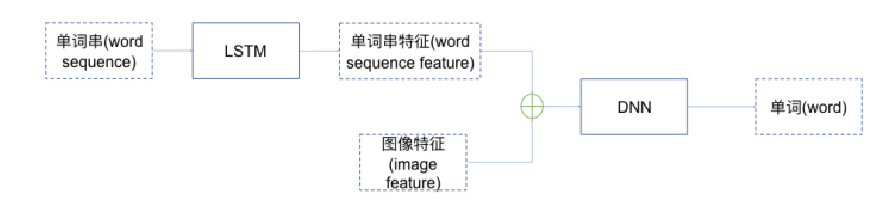

In [15]:
path2 = "drive/My Drive/计算机视觉/Image Captioning/网络结构.jpg"
# 网络结构
img2 = mpimg.imread(path2)
plt.figure(figsize = (15, 15))
plt.imshow(img2)
plt.axis('off')
plt.show()

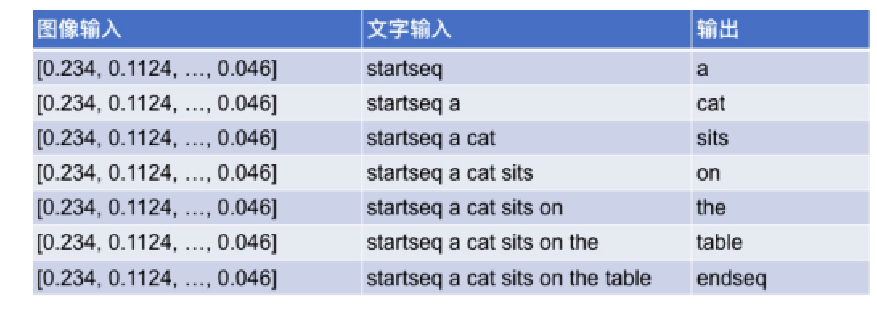

In [16]:
path3 = "drive/My Drive/计算机视觉/Image Captioning/任务三.jpg"
# 网络结构
img3 = mpimg.imread(path3)
plt.figure(figsize = (15, 15))
plt.imshow(img3)
plt.axis('off')
plt.show()

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from numpy import array
from pickle import load
# import util

In [0]:
# util.py
from pickle import load
from numpy import array
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def load_doc(filename):
    """读取文本文件为string

    Args:
        filename: 文本文件

    Returns:
        string, 文本文件的内容
    """
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text


#将主题数据从字典变为list
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc


def get_max_length(captions):
    """从标题字典计算图像标题里面最长的标题的长度

    Args:
        captions: 一个dict, key为文件名(不带.jpg后缀), value为图像标题list

    Returns:
        最长标题的长度

    """
    lines = to_lines(captions)
    return max(len(d.split()) for d in lines)


def load_set(filename):
    """从文本文件加载图像名set

    Args:
        filename: 文本文件,每一行都包含一个图像文件名（包含.jpg文件后缀）

    Returns:get_max_length
        set, 文件名，去除了.jpg后缀
    """

    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        dataset.append(identifier)
    return set(dataset)


def load_clean_captions(filename, dataset):
    """为图像标题首尾分别加上'startseq ' 和 ' endseq', 作为自动标题生成的起始和终止

    Args:
        filename: 文本文件,每一行由图像名,和图像标题构成, 图像的标题已经进行了清洗
        dataset: 图像名list

    Returns:
        dict, key为图像名, value为添加了＇startseq'和＇endseq'的标题list
    """

    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        # skip images not in the set
        if image_id in dataset:
            # create list
            if image_id not in descriptions:
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            # store
            descriptions[image_id].append(desc)
    return descriptions


def load_photo_features(filename, dataset):
    """从图像特征文件中加载给定图像名list对应的图像特征

    Args:
        filename: 包含图像特征的文件名, 文件加载以后是一个字典,
                    key为'Flicker8k_Dataset/' + 文件名,
                    value为文件名对应的图表的特征
        dataset: 图像文件名list

    Returns:
        图像特征字典, key为文件名,
                    value为文件名对应的图表的特征

    """
    # load all features
    all_features = load(open(filename, 'rb'))
    # filter features
    features = {k: all_features[k] for k in dataset}
    return features

#根据数据训练模型
#读取一组图像id
def load_ids(fn):
    doc = load_doc(fn)
    ret = list()
    for line in doc.split('\n'):
        if len(line) < 1:
            continue
        id = line.split('.')[0]
        ret.append(id)
    return set(ret)

In [19]:
'''
keras.preprocessing.text.Tokenizer(num_words = None, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
lower = True, split = ' ', char_level = False, oov_token = None)
'''
'''
Example:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
lines = ['this is good', 'that is a cat']
tokenizer.fit_on_texts(lines)
results = tokenizer.texts_to_sequences(['cat is good'])
print(results[0])
'''

"\nExample:\nfrom keras.preprocessing.text import Tokenizer\n\ntokenizer = Tokenizer()\nlines = ['this is good', 'that is a cat']\ntokenizer.fit_on_texts(lines)\nresults = tokenizer.texts_to_sequences(['cat is good'])\nprint(results[0])\n"

In [20]:
'''
max_length = 6
vocab_size = 661
seq = [2,660,6,229,3]
i =1
in_seq,out_seq = seq[:i],seq[i]
in_seq = pad_sequences([in_seq],maxlen=max_length)[0]
out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
print(in_seq,out_seq)
'''

'\nmax_length = 6\nvocab_size = 661\nseq = [2,660,6,229,3]\ni =1\nin_seq,out_seq = seq[:i],seq[i]\nin_seq = pad_sequences([in_seq],maxlen=max_length)[0]\nout_seq = to_categorical([out_seq],num_classes=vocab_size)[0]\nprint(in_seq,out_seq)\n'

In [0]:
def create_tokenizer():
  # 产生description.txt
  '''
  根据训练数据集中的图像名，和其对应的标题，生成一个tokenizer
  :return: 生成的tokenizer
  https://keras-cn.readthedocs.io/en/latest/legacy/preprocessing/text/#
  '''
  train_image_names = load_set('drive/My Drive/计算机视觉/Image Captioning/Flickr_8k.trainImages.txt')
  train_descriptions = load_clean_captions('description.txt', train_image_names)
  lines = to_lines(train_descriptions)
  pass

In [0]:
def create_input_data(tokenizer, max_length, descriptions, photos_features, vocab_size):
    """
    从输入的图片标题list和图片特征构造LSTM的一组输入

    Args:
    :param tokenizer: 英文单词和整数转换的工具keras.preprocessing.text.Tokenizer
    :param max_length: 训练数据集中最长的标题的长度
    :param descriptions: dict, key 为图像的名(不带.jpg后缀), value 为list, 包含一个图像的几个不同的描述
    :param photos_features:  dict, key 为图像的名(不带.jpg后缀), value 为numpy array 图像的特征
    :param vocab_size: 训练集中表的单词数量
    :return: tuple:
            第一个元素为 numpy array, 元素为图像的特征, 它本身也是 numpy.array
            第二个元素为 numpy array, 元素为图像标题的前缀, 它自身也是 numpy.array
            第三个元素为 numpy array, 元素为图像标题的下一个单词(根据图像特征和标题的前缀产生) 也为numpy.array

    Examples:
        from pickle import load
        tokenizer = load(open('tokenizer.pkl', 'rb'))
        max_length = 6
        descriptions = {'1235345':['startseq one bird on tree endseq', "startseq red bird on tree endseq"],
                        '1234546':['startseq one boy play water endseq', "startseq one boy run across water endseq"]}
        photo_features = {'1235345':[ 0.434,  0.534,  0.212,  0.98 ],
                          '1234546':[ 0.534,  0.634,  0.712,  0.28 ]}
        vocab_size = 7378
        print(create_input_data(tokenizer, max_length, descriptions, photo_features, vocab_size))
(array([[ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.434,  0.534,  0.212,  0.98 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ],
       [ 0.534,  0.634,  0.712,  0.28 ]]),
array([[  0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   2,  59],
       [  0,   0,   0,   2,  59, 254],
       [  0,   0,   2,  59, 254,   6],
       [  0,   2,  59, 254,   6, 134],
       [  0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   2,  26],
       [  0,   0,   0,   2,  26, 254],
       [  0,   0,   2,  26, 254,   6],
       [  0,   2,  26, 254,   6, 134],
       [  0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   2,  59],
       [  0,   0,   0,   2,  59,  16],
       [  0,   0,   2,  59,  16,  82],
       [  0,   2,  59,  16,  82,  24],
       [  0,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   2,  59],
       [  0,   0,   0,   2,  59,  16],
       [  0,   0,   2,  59,  16, 165],
       [  0,   2,  59,  16, 165, 127],
       [  2,  59,  16, 165, 127,  24]]),
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))
    """
    X1, X2, y = list(), list(), list()
    for key, desc_list in descriptions.items():
      for desc in desc_list:
        seq = tokenizer.texts_to_sequence([desc])[0]
        for i in range (1, len(seq)):
          in_seq, out_seq = seq[:i], seq[i]
          # 填充in_seq, 使其长度为max_length
          in_seq = pad_sequence([in_seq], maxlen = max_length)[0]
          out_seq = to_categorical([out_seq], num_classes = vocab_size)[0]
          X1.append(photos_features[key][0])
          X2.append(in_seq)
          y.append(out_seq)
    return np.array(X1), np.array(X1), np.array(y)

# task4: 构建自动产生图像标题的网络结构

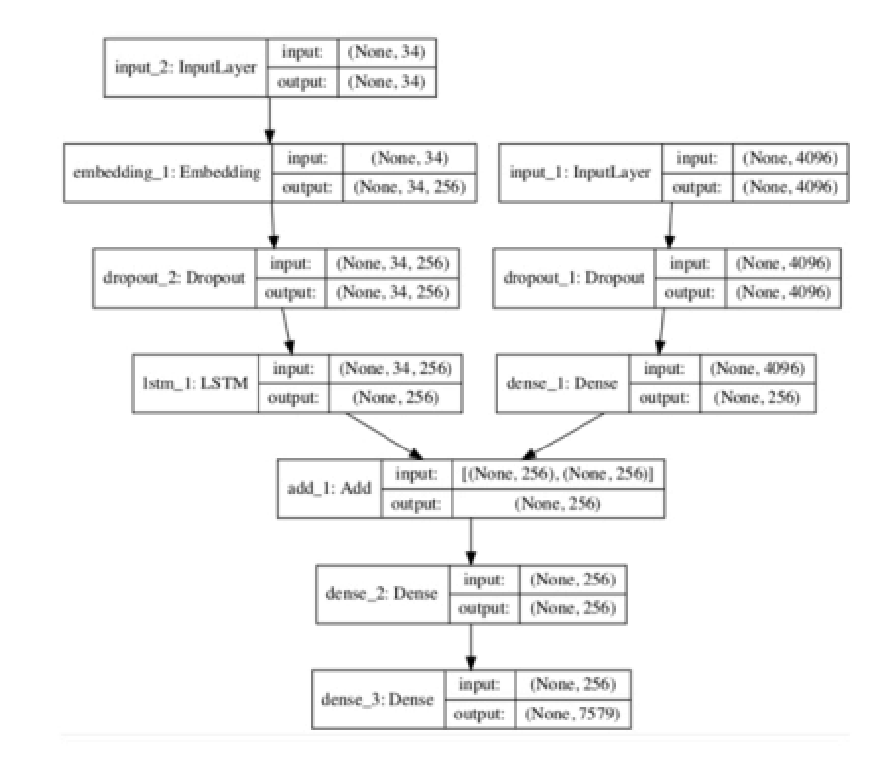

In [23]:
path4 = "drive/My Drive/计算机视觉/Image Captioning/任务四.jpg"
# 网络结构
img4 = mpimg.imread(path4)
plt.figure(figsize = (15, 15))
plt.imshow(img4)
plt.axis('off')
plt.show()

In [24]:
'''
Example:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add

input1 = Input(shape = (4096,))

dropout_1 = Dropout(0.5)(input1)
dense_1 = Dense(256, activation = 'relu')(dropout_1)

input2 = Input(shape = (max_len,))
embed_1 = Embedding(vocab_size, 256)(input2)
lstm_1 = LSTM(256, activation = 'relu')(embed_1)

add_1 = add([dense_1, lstm_1])
dense_2 = Dense(256, activation = 'relu')(add_1)
outputs = Dense(vocab_size, activation = 'softmax')(dense_2)
model = Model(inputs = [input1, input2], outputs = outputs)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
'''

"\nExample:\nfrom keras.models import Model\nfrom keras.layers import Input\nfrom keras.layers import Dense\nfrom keras.layers import LSTM\nfrom keras.layers import Embedding\nfrom keras.layers import Dropout\nfrom keras.layers.merge import add\n\ninput1 = Input(shape = (4096,))\n\ndropout_1 = Dropout(0.5)(input1)\ndense_1 = Dense(256, activation = 'relu')(dropout_1)\n\ninput2 = Input(shape = (max_len,))\nembed_1 = Embedding(vocab_size, 256)(input2)\nlstm_1 = LSTM(256, activation = 'relu')(embed_1)\n\nadd_1 = add([dense_1, lstm_1])\ndense_2 = Dense(256, activation = 'relu')(add_1)\noutputs = Dense(vocab_size, activation = 'softmax')(dense_2)\nmodel = Model(inputs = [input1, input2], outputs = outputs)\nmodel.compile(loss = 'categorical_crossentropy', optimizer = 'adam')\n"

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from pickle import load
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras import callbacks

In [0]:

def create_batches(desc_list, photo_features, tokenizer, max_len, vocab_size=7378):
    """从输入的图片标题list和图片特征构造LSTM的一组输入

    Args:
        desc_list: 某一个图像对应的一组标题(一个list)
        photo_features: 某一个图像对应的特征
        tokenizer: 英文单词和整数转换的工具keras.preprocessing.text.Tokenizer
        max_len: 训练数据集中最长的标题的长度
        vocab_size: 训练集中的单词个数, 默认为7378

    Returns:
        tuple:
            第一个元素为list, list的元素为图像的特征
            第二个元素为list, list的元素为图像标题的前缀
            第三个元素为list, list的元素为图像标题的下一个单词(根据图像特征和标题的前缀产生)

    Examples:
        #>>> from pickle import load
        #>>> tokenizer = load(open('tokenizer.pkl', 'rb'))
        #>>> desc_list = ['startseq one dog on desk endseq', "startseq red bird on tree endseq"]
        #>>> photo_features = [0.434, 0.534, 0.212, 0.98]
        #>>> print(create_batches(desc_list, photo_features, tokenizer, 6, 7378))
            (array([[ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ],
                   [ 0.434,  0.534,  0.212,  0.98 ]]),
            array([[   0,    0,    0,    0,    0,    2],
                   [   0,    0,    0,    0,    2,   59],
                   [   0,    0,    0,    2,   59,    9],
                   [   0,    0,    2,   59,    9,    6],
                   [   0,    2,   59,    9,    6, 1545],
                   [   0,    0,    0,    0,    0,    2],
                   [   0,    0,    0,    0,    2,   26],
                   [   0,    0,    0,    2,   26,  254],
                   [   0,    0,    2,   26,  254,    6],
                   [   0,    2,   26,  254,    6,  134]]),
            array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
                   [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                   [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                   ...,
                   [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                   [ 0.,  0.,  0., ...,  0.,  0.,  0.],
                   [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

    """
    X1, X2, y = list(), list(), list()
    # walk through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_len)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(photo_features)
            X2.append(in_seq)
            y.append(out_seq)
    return array(X1), array(X2), array(y)

In [0]:
# data generator, intended to be used in a call to model.fit_generator()
def data_generator(captions, photo_features, tokenizer, max_len):
    """创建一个训练数据生成器, 用于传入模型训练函数的第一个参数model.fit_generator(generator,...)

    Args:
        captions: dict, key为图像名(不包含.jpg后缀), value为list, 图像的几个训练标题
        photo_features: dict, key为图像名(不包含.jpg后缀), value为图像的特征
        tokenizer: 英文单词和整数转换的工具keras.preprocessing.text.Tokenizer
        max_len: 训练集中的标题最长长度

    Returns:
        generator, 使用yield [[list, 元素为图像特征, list, 元素为输入的图像标题前缀], list, 元素为预期的输出图像标题的下一个单词]

    """

    # loop for ever over images
    while 1:
        for key, desc_list in captions.items():
            # retrieve the photo feature
            photo_feature = photo_features[key][0]
            in_img, in_seq, out_word = create_batches(desc_list, photo_feature, tokenizer, max_len)
            yield [[in_img, in_seq], out_word]

In [0]:
def caption_model(vocab_size, max_len):
    """创建一个新的用于给图片生成标题的网络模型

    Args:
        vocab_size: 训练集中标题单词个数
        max_len: 训练集中的标题最长长度

    Returns:
        用于给图像生成标题的网络模型

    """
    input1 = Input(shape = (4096,))

    dropout_1 = Dropout(0.5)(input1)
    dense_1 = Dense(256, activation = 'relu')(dropout_1)

    input2 = Input(shape = (max_len,))
    embed = Embedding(vocab_size, 256)(input2)
#     dropout_2 = Dropout(0.5)(embed)
    lstm_1 = LSTM(256, activation = 'relu')(embed)

    add_1 = add([dense_1, lstm_1])
    dense_2 = Dense(256, activation = 'relu')(add_1)
    outputs = Dense(vocab_size, activation = 'softmax')(dense_2)
    model = Model(inputs = [input1, input2], outputs = outputs)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
    return model

In [0]:
def train():
    # load training dataset (6K)
    filename = 'drive/My Drive/计算机视觉/Image Captioning/Flickr_8k.trainImages.txt'
    train = load_ids(filename)
    print('Dataset: %d' % len(train))
    train_captions = load_clean_captions('drive/My Drive/计算机视觉/Image Captioning/descriptions.txt', train)
    print('Captions: train number=%d' % len(train_captions))
    # photo features
    train_features = load_photo_features('drive/My Drive/计算机视觉/Image Captioning/features.pkl', train)
    print('Photos: train=%d' % len(train_features))
    # prepare tokenizer
    tokenizer = load(open('drive/My Drive/计算机视觉/Image Captioning/tokenizer.pkl', 'rb'))
    vocab_size = len(tokenizer.word_index) + 1
    print('Vocabulary Size: %d' % vocab_size)
    # determine the maximum sequence length
    max_len = get_max_length(train_captions)
    print('Description Length: %d' % max_len)

    # define the model
    model = caption_model(vocab_size, max_len)
    model.summary()
    # train the model, run epochs manually and save after each epoch
    epochs = 20
    steps = len(train_captions)
    
    save_best = callbacks.ModelCheckpoint('drive/My Drive/计算机视觉/Image Captioning/model_11_best.h5',monitor='loss',verbose=1,save_best_only=True,mode='min')
    early_stop = callbacks.EarlyStopping(monitor='loss',min_delta=0,patience=15,verbose=0,mode='auto')
    callbacks_list = [early_stop,save_best]
    for i in range(epochs):
        # create the data generator
        generator = data_generator(train_captions, train_features, tokenizer, max_len)
        # fit for one epoch
        model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1, callbacks = callbacks_list)
        # save model
        model.save('drive/My Drive/计算机视觉/Image Captioning/model_' + str(i) + '.h5')

In [0]:
if __name__ == '__main__':
  train()

Dataset: 6000
Captions: train number=6000
Photos: train=6000
Vocabulary Size: 7378
Description Length: 40
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 4096)         0           input_3[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 40, 256)      1888768     input_4[0][0]       

# task5: 完成预测generate_caption代码

In [0]:
'''
Example:
from keras.preprocessing.sequence import pad_sequences

in_text = 'startseq'
for i in range(max_length):
  sequence = tokenizer.texts_to_sequences([in_text])
  sequence = pad_sequences(sequence, maxlen = max_length)
  output = model.predict([photo_feature, sequence])
  integer = np.argmax(output)
  word = word_for_id(integer, tokenizer)
  in_text = in_text + ' ' + word
  if word is None:
    break
  if word == 'endseq':
    break

'''

In [0]:
import numpy as np
from pickle import load
from nltk.translate.bleu_score import corpus_bleu
from keras.models import load_model
from PIL import Image

In [0]:
def word_for_id(integer, tokenizer):
    """
    将一个整数转换为英文单词
    :param integer: 一个代表英文的整数
    :param tokenizer: 一个预先产生的keras.preprocessing.text.Tokenizer
    :return: 输入整数对应的英文单词
    """
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [0]:
def generate_caption(model, tokenizer, photo_feature, max_length = 40):
    """
    根据输入的图像特征产生图像的标题
    :param model: 预先训练好的图像标题生成神经网络模型
    :param tokenizer: 一个预先产生的keras.preprocessing.text.Tokenizer
    :param photo_feature:输入的图像特征, 为VGG16网络修改版产生的特征
    :param max_length: 训练数据中最长的图像标题的长度
    :return: 产生的图像的标题
    """
    in_text = 'startseq'
    for i in range(max_length):
      sequence = tokenizer.texts_to_sequences([in_text])
      sequence = pad_sequences(sequence, maxlen = max_length)
      output = model.predict([photo_feature, sequence])
      integer = np.argmax(output)
      word = word_for_id(integer, tokenizer)
      print(word)
      if word is None:
        break
      in_text = in_text + ' ' + word
      if word == 'endseq':
        break
    return in_text

In [0]:
def evaluate_model(model, captions, photo_features, tokenizer, max_length = 40):
    """计算训练好的神经网络产生的标题的质量,根据4个BLEU分数来评估

    Args:
        model:　训练好的产生标题的神经网络
        captions: dict, 测试数据集, key为文件名(不带.jpg后缀), value为图像标题list
        photo_features: dict, key为文件名(不带.jpg后缀), value为图像特征
        tokenizer: 英文单词和整数转换的工具keras.preprocessing.text.Tokenizer
        max_length：训练集中的标题的最大长度

    Returns:
        tuple:
            第一个元素为权重为(1.0, 0, 0, 0)的ＢＬＥＵ分数
            第二个元素为权重为(0.5, 0.5, 0, 0)的ＢＬＥＵ分数
            第三个元素为权重为(0.3, 0.3, 0.3, 0)的ＢＬＥＵ分数
            第四个元素为权重为(0.25, 0.25, 0.25, 0.25)的ＢＬＥＵ分数

    """
    '''
    Examples:
    from nltk.translate.bleu.score import corpus_bleu
    references = [[['there', 'is', 'a', 'cat', 'and', 'a', 'dog']]]
    candidates = [[['there', 'is', 'a', 'cat', 'and', 'a', 'pig']]]
    score = corpus_bleu(references, candidates, weights = (1, 0, 0, 0))  # N-grams
    print(score)
    '''
    actual, predicted = list(), list()
    for key, caption_list in captions.items():
      yhat = generate_caption(model, tokenizer, photo_features[key], max_length)
      references = [d.split() for d in caption_list]
      actual.append(references)
      predicted.append(yhat.split)
    b1 = corpus_bleu(actual, predicted, weights = (1.0, 0, 0, 0))
    b2 = corpus_bleu(actual, predicted, weights = (0.5, 0.5, 0, 0))
    b3 = corpus_bleu(actual, predicted, weights = (0.3, 0.3, 0.3, 0))
    b4 = corpus_bleu(actual, predicted, weights = (0.25, 0.25, 0.25, 0.25))
    return b1, b2, b3, b4

In [0]:
def generate_caption_run(image_path):
  # load test set
  filename = 'drive/My Drive/计算机视觉/Image Captioning/Flickr_8k.testImages.txt'
  test = load_ids(filename)
  # photo features
  test_features = load_photo_features('drive/My Drive/计算机视觉/Image Captioning/features.pkl', test)
  print('Phtos: test = %d' % len(test_features))
  
  # load the model
  filename = 'drive/My Drive/计算机视觉/Image Captioning/model_11_best.h5'
  model = load_model(filename)
  
  tokenizer = load(open('drive/My Drive/计算机视觉/Image Captioning/tokenizer.pkl', 'rb'))
  caption = generate_caption(model, tokenizer, test_features[image_path], 40)
  str1 = "drive/My Drive/计算机视觉/Image Captioning/Flicker8k_Dataset/"+imag_path + '.jpg'
  print(str1)
  img = Image.open(str1)
  plt.figure(figsize=(20,20))
  plt.imshow(img)
  plt.xlabel(caption[9:][:-6],fontsize=15,color='red')
  plt.show()
  print(caption)
  return caption

3385593926_d3e9c21170
Phtos: test = 1000
a
black
dog
is
running
through
the
snow
endseq
drive/My Drive/计算机视觉/Image Captioning/Flicker8k_Dataset/3385593926_d3e9c21170.jpg


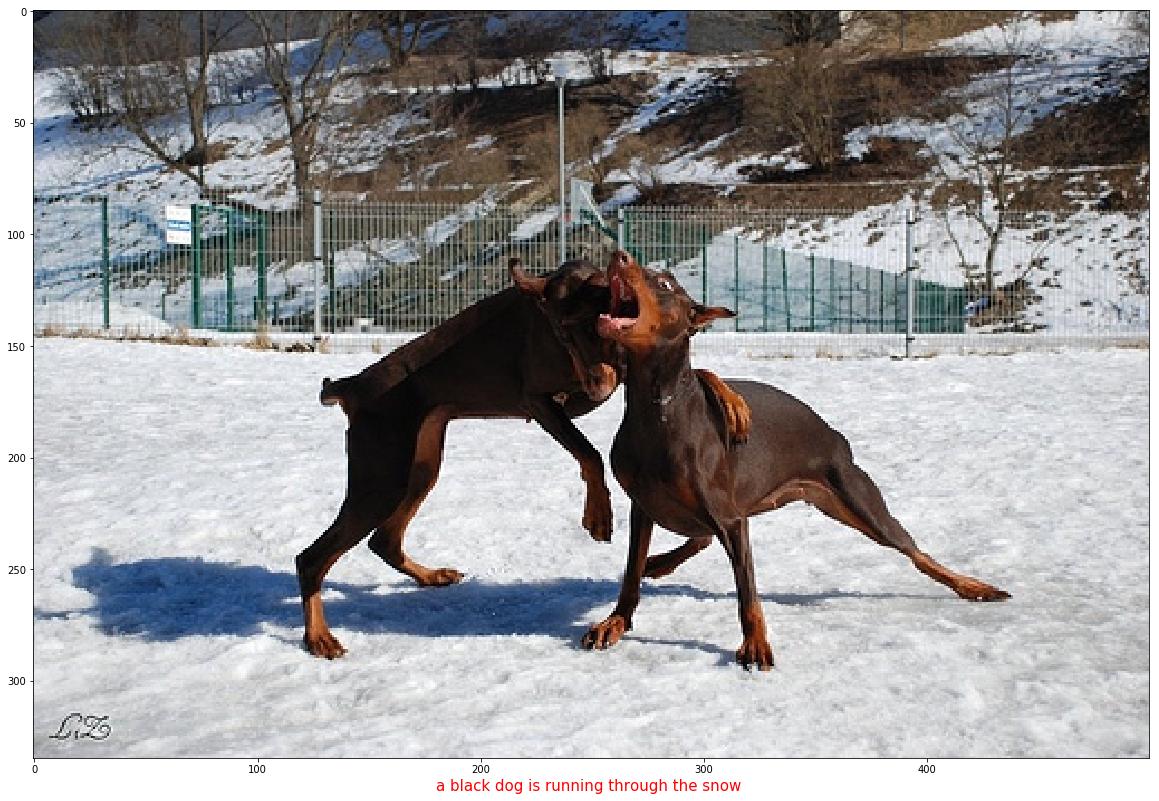

startseq a black dog is running through the snow endseq
result is:startseq a black dog is running through the snow endseq


In [28]:
if __name__ == '__main__':
    imag_path = '3385593926_d3e9c21170.jpg'
    imag_path = imag_path[:-4]
    print(imag_path)
    result = generate_caption_run(imag_path)
    print('result is:' + str(result))